In [151]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1 - User Overview analysis

In [152]:
#imports 
import pandas as pd      # data manipulation transformation 
import numpy as np       # numerical data analysis 
import matplotlib.pyplot as plt
import seaborn as sns    # data visualization
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #higher resolution
# importing the style package
from matplotlib import style
# using the style for the plot
plt.style.use('ggplot')
import sqlite3
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA



In [153]:
import warnings
warnings.filterwarnings('ignore')
path ="/content/drive/MyDrive/week 1 colab /Week1_challenge_data_source.csv"
data = pd.read_csv(path)
 #data set is load and stored in pandas data frame
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,845,000,704.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,42.00,5.00,23.00,44.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,nan,nan,nan,nan,nan,nan,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,879,000,576.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),nan,nan,nan,nan,nan,nan,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,081,000,448.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,nan,nan,6.00,9.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),nan,nan,nan,nan,nan,nan,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,443,000,320.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,nan,nan,44.00,44.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,nan,nan,nan,nan,nan,nan,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,999,936.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,nan,nan,6.00,9.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,nan,nan,nan,nan,nan,nan,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,96

In [154]:
data.describe

<bound method NDFrame.describe of                            Bearer Id  ... Total DL (Bytes)
0      13,114,483,460,845,000,704.00  ...   308,879,636.00
1      13,114,483,482,879,000,576.00  ...   653,384,965.00
2      13,114,483,484,081,000,448.00  ...   279,807,335.00
3      13,114,483,485,443,000,320.00  ...   846,028,530.00
4      13,114,483,499,480,999,936.00  ...   569,138,589.00
...                              ...  ...              ...
149996  7,277,825,670,196,700,160.00  ...   574,175,259.00
149997  7,349,883,264,234,600,448.00  ...   666,648,844.00
149998 13,114,483,573,366,999,040.00  ...   592,786,405.00
149999 13,114,483,573,366,999,040.00  ...   371,895,920.00
150000                           nan  ...              nan

[150001 rows x 55 columns]>

Explore what has been stored in it. The column names, how many data points, number of colum, data shape

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [157]:
# column names
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [158]:
# number of data points (row ,column)
data.shape 

(150001, 55)

In [159]:
#data types
data.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Handling Missing Values

In [162]:
# missing values in the dataset?
def percent_missing(dm):

    # Calculate total number of cells in dataframe
    totalCells = np.product(dm.shape)

    # Count number of missing values per column
    missingCount = dm.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The telecom dataset contains 12.5 % missing values.


In [164]:
#column(s) has missing values 
data.isna().sum().sort_values(ascending=False) #columns in descending order to see columns with highest missing values


Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [165]:
len(data) #length of the data frame

150001

In [166]:
data.isna().sum().sort_values(ascending=False)/len(data)*100 #to get % of missing values in each column descending method
#print(type(data))

Nb of sec with 37500B < Vol UL             86.84
Nb of sec with 6250B < Vol UL < 37500B     74.56
Nb of sec with 125000B < Vol DL            65.02
TCP UL Retrans. Vol (Bytes)                64.43
Nb of sec with 31250B < Vol DL < 125000B   62.39
Nb of sec with 1250B < Vol UL < 6250B      61.93
Nb of sec with 6250B < Vol DL < 31250B     58.88
TCP DL Retrans. Vol (Bytes)                58.76
HTTP UL (Bytes)                            54.54
HTTP DL (Bytes)                            54.32
Avg RTT DL (ms)                            18.55
Avg RTT UL (ms)                            18.54
Last Location Name                          0.77
MSISDN/Number                               0.71
Bearer Id                                   0.66
Nb of sec with Vol UL < 1250B               0.53
UL TP < 10 Kbps (%)                         0.53
10 Kbps < UL TP < 50 Kbps (%)               0.53
50 Kbps < UL TP < 300 Kbps (%)              0.53
UL TP > 300 Kbps (%)                        0.53
Nb of sec with Vol D

How to fix missing values

In [167]:
# drop columns with more than 30% missing values
perc = 30.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
mod_df = data.dropna( axis=1, thresh=min_count)

#print modified data

mod_df.isna().sum().sort_values(ascending=False)/len(data)*100 
#print(min_count)
#print(data.shape, mod_df.shape)

#print( type (mod_df)) 

Avg RTT DL (ms)                  18.55
Avg RTT UL (ms)                  18.54
Last Location Name                0.77
MSISDN/Number                     0.71
Bearer Id                         0.66
Nb of sec with Vol UL < 1250B     0.53
50 Kbps < UL TP < 300 Kbps (%)    0.53
UL TP > 300 Kbps (%)              0.53
UL TP < 10 Kbps (%)               0.53
10 Kbps < UL TP < 50 Kbps (%)     0.53
Nb of sec with Vol DL < 6250B     0.50
DL TP < 50 Kbps (%)               0.50
50 Kbps < DL TP < 250 Kbps (%)    0.50
250 Kbps < DL TP < 1 Mbps (%)     0.50
DL TP > 1 Mbps (%)                0.50
IMEI                              0.38
Handset Type                      0.38
Handset Manufacturer              0.38
IMSI                              0.38
Dur. (ms)                         0.00
End ms                            0.00
Avg Bearer TP UL (kbps)           0.00
End                               0.00
Start ms                          0.00
Start                             0.00
Avg Bearer TP DL (kbps)  

In [168]:

# cleaning data frame
mod_df.dropna(subset = ["Bearer Id", "MSISDN/Number"], inplace=True)
cols=['Avg RTT DL (ms)','Avg RTT UL (ms)','Last Location Name','10 Kbps < UL TP < 50 Kbps (%)','Nb of sec with Vol UL < 1250B','50 Kbps < UL TP < 300 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','UL TP < 10 Kbps (%)',
      'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','DL TP > 1 Mbps (%)','250 Kbps < DL TP < 1 Mbps (%)','50 Kbps < DL TP < 250 Kbps (%)','DL TP < 50 Kbps (%)']
for col in cols:
  mod_df[col]=mod_df[col].fillna(method='ffill')

mod_df.isna().sum().sort_values(ascending=False)/len(data)*100

#data.isna().sum().sort_values(ascending=False)/len(data)*100
#print (type(data))


Total DL (Bytes)                 0.00
UL TP > 300 Kbps (%)             0.00
10 Kbps < UL TP < 50 Kbps (%)    0.00
UL TP < 10 Kbps (%)              0.00
DL TP > 1 Mbps (%)               0.00
250 Kbps < DL TP < 1 Mbps (%)    0.00
50 Kbps < DL TP < 250 Kbps (%)   0.00
DL TP < 50 Kbps (%)              0.00
Avg Bearer TP UL (kbps)          0.00
Avg Bearer TP DL (kbps)          0.00
Avg RTT UL (ms)                  0.00
Avg RTT DL (ms)                  0.00
Last Location Name               0.00
IMEI                             0.00
MSISDN/Number                    0.00
IMSI                             0.00
Dur. (ms)                        0.00
End ms                           0.00
End                              0.00
Start ms                         0.00
Start                            0.00
50 Kbps < UL TP < 300 Kbps (%)   0.00
Activity Duration DL (ms)        0.00
Total UL (Bytes)                 0.00
Activity Duration UL (ms)        0.00
Other UL (Bytes)                 0.00
Other DL (By

Transforming Data
Scaling and Normalization

In [169]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1555,400.71
24,292.52
1534,148.06
1163,85.23
1669,55.75


In [170]:
original_data[0].min(), original_data[0].max()

(0.05688972126085809, 1497.6548295289776)

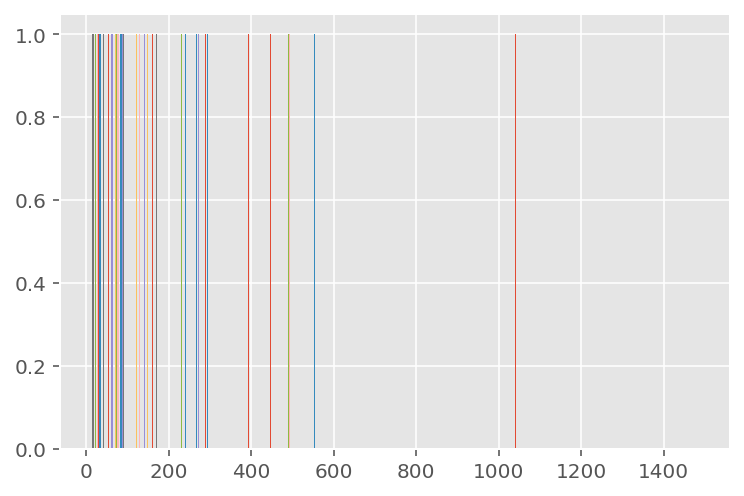

In [171]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

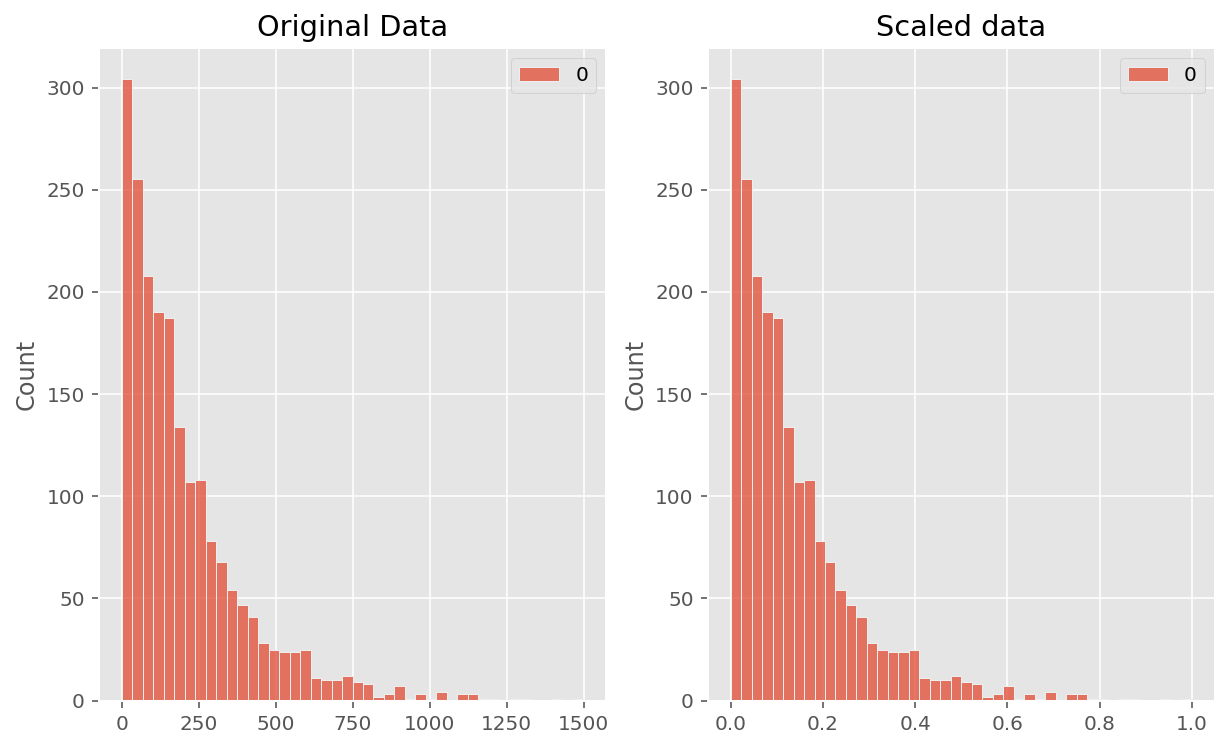

In [172]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

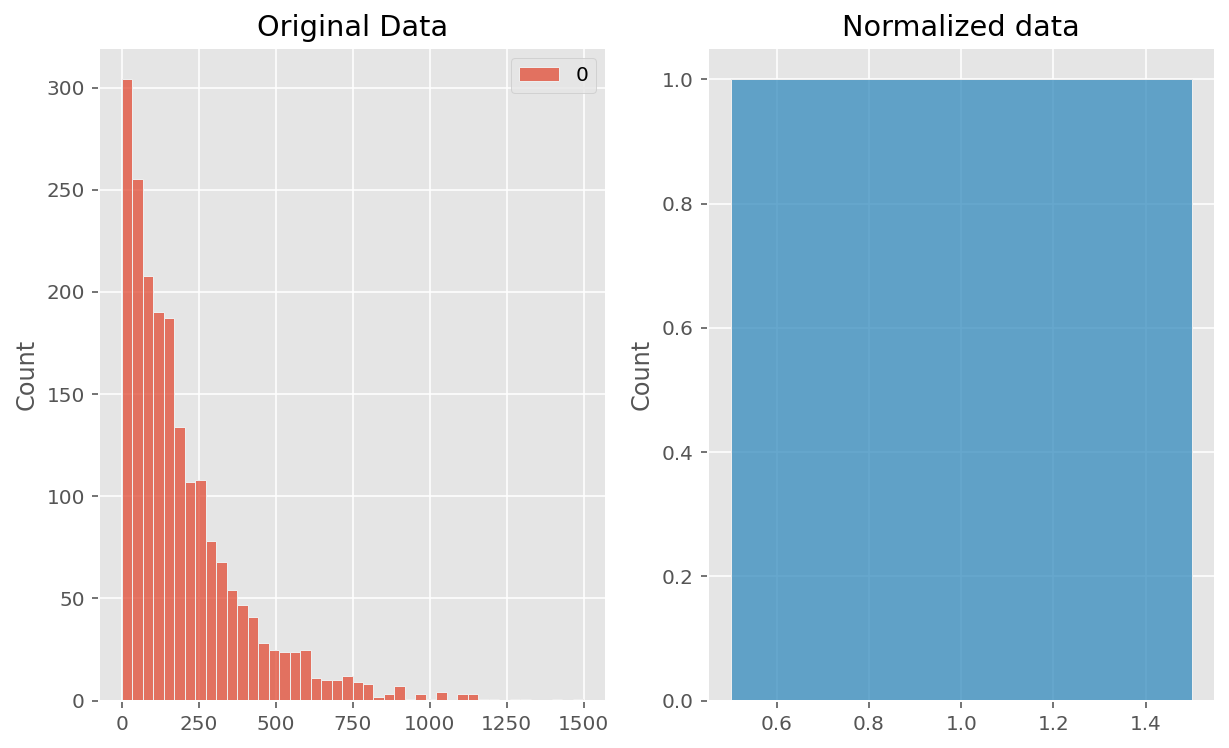

In [173]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis &
the following sub-tasks are your guidance:   
● Start by identifying the top 10 handsets used by the customers.   
● Then, identify the top 3 handset manufacturers  
● Next, identify the top 5 handsets per top 3 handset manufacturer   
● Make a short interpretation and recommendation to marketing teams


In [175]:
#Start by identifying the top 10 handsets used by the customers.
data["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [176]:
#identify the top 3 handset manufacturers
data["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [177]:
#identify the top 5 handsets per top 3 handset manufacturer
apple_handsets = data[data["Handset Manufacturer"] == "Apple"]
apple_handsets["Handset Type"].value_counts().head(5)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [178]:
apple_handsets = data[data["Handset Manufacturer"] == "Samsung"]
apple_handsets["Handset Type"].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [179]:
apple_handsets = data[data["Handset Manufacturer"] == "Huawei"]
apple_handsets["Handset Type"].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [ ]:
#● Make a short interpretation and recommendation to marketing teams


*  The marketing team needs to focus on users with handsets from these top three manufacturers: Apple, Samsung and Huawei.

**Analysis**

Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.     
● Aggregate per user the following information in the column     
○ number of xDR sessions     
○ Session duration      
○ the total download (DL) and upload (UL) data     
○ the total data volume (in Bytes) during this session for each application 



In [180]:
aggrigate = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
aggrigation_res =data.groupby('MSISDN/Number').agg(aggrigate)
aggrigation_res.describe()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
count,"106,856.00","106,856.00","106,856.00","106,856.00"
mean,1.39,"146,167.16","57,309,422.41","633,652,680.89"
std,0.81,"186,358.67","35,657,649.75","464,555,056.46"
min,0.00,"7,142.00","2,866,892.00","8,827,082.00"
25%,1.00,"71,308.00","36,395,474.75","314,827,063.75"
50%,1.00,"102,740.00","46,793,865.50","570,367,723.00"
75%,2.00,"172,799.00","65,731,993.00","807,364,490.25"
max,18.00,"18,553,754.00","729,577,380.00","8,156,743,493.00"


In [181]:
sessions = data[["MSISDN/Number","Bearer Id"]]
session_count = sessions.groupby(["MSISDN/Number"]).count()
session_count

,Bearer Id
MSISDN/Number,
"33,601,001,722.00",1
"33,601,001,754.00",1
"33,601,002,511.00",1
"33,601,007,832.00",1
"33,601,008,617.00",2
...,...
"33,789,996,170.00",1
"33,789,997,247.00",1
"3,197,020,876,596.00",1


In [183]:
session_count.describe()

,Bearer Id
count,"106,856.00"
mean,1.39
std,0.81
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,18.00


In [184]:
# data usage 
data_usage = data[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
data_usage.groupby(["MSISDN/Number"]).agg('sum')

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
"33,601,001,722.00","116,720,140.00","842,637,466.00","36,053,108.00"
"33,601,001,754.00","181,230,963.00","120,755,184.00","36,104,459.00"
"33,601,002,511.00","134,969,374.00","556,659,663.00","39,306,820.00"
"33,601,007,832.00","49,878,024.00","401,993,172.00","20,327,526.00"
"33,601,008,617.00","37,104,453.00","1,363,130,417.00","94,280,527.00"
...,...,...,...
"33,789,996,170.00","8,810,688.00","687,925,212.00","26,716,429.00"
"33,789,997,247.00","140,988,659.00","444,575,092.00","35,732,243.00"
"3,197,020,876,596.00","877,385,325.00","194,828,056.00","37,295,915.00"


**user Behaviour**

In [188]:
# user
aggrigate = {
    'Total Social Media':'sum',
    'Total Google': 'sum', 
    'Total Youtube': 'sum', 
    'Total Netflix':'sum',
    'Total Gaming':'sum',
    'Total Other':'sum',
    'Total Email': 'sum',
    'Total':'sum'
    }
data = data.copy()

data["Total Google"] = data["Google DL (Bytes)"] + data["Google UL (Bytes)"]
data["Total Youtube"] = data["Youtube DL (Bytes)"] + data["Youtube UL (Bytes)"]
data["Total Netflix"] = data["Netflix DL (Bytes)"] + data["Netflix UL (Bytes)"]
data["Total Email"] = data["Email DL (Bytes)"] + data["Email UL (Bytes)"]
data["Total Gaming"] = data["Gaming DL (Bytes)"] + data["Gaming UL (Bytes)"]
data["Total Social Media"] = data["Social Media DL (Bytes)"] + data["Social Media UL (Bytes)"]
data["Total Other"] = data["Other DL (Bytes)"] + data["Other UL (Bytes)"]
data["Total "] = data["Total DL (Bytes)"] + data["Total UL (Bytes)"]


data_usage = data[["Bearer Id","MSISDN/Number","Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", 
                 "Total Social Media", "Total Other","Total"]]
data_usage.groupby(["MSISDN/Number"]).agg('sum')
#app_data.info()


KeyError: ignored

Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [189]:
#checking for null values
data[["Dur. (ms).1","Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].isna().sum().head(60)

Dur. (ms).1           1
Total DL (Bytes)      1
Total UL (Bytes)      1
Total Social Media    0
Total Google          0
Total Email           0
Total Youtube         0
Total Netflix         0
Total Gaming          0
dtype: int64

In [190]:
#filling the null values with the mean of the column
data["Total DL (Bytes)"].fillna(data["Total DL (Bytes)"].mean(), inplace = True)
data["Total UL (Bytes)"].fillna(data["Total UL (Bytes)"].mean(), inplace = True)
data["Dur. (ms).1"].fillna(data["Dur. (ms).1"].mean(), inplace = True)

In [191]:
data[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].describe()

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Total Social Media,Total Google,Total Email,Total Youtube,Total Netflix,Total Gaming
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"104,609,105.55","454,643,430.08","41,121,206.29","1,828,250.21","7,807,294.55","2,259,102.31","22,643,482.64","22,628,606.54","430,333,100.71"
std,"81,037,341.45","244,142,060.57","11,276,348.93","1,035,646.14","3,516,420.24","1,071,109.06","9,246,800.31","9,260,820.09","244,019,924.02"
min,"7,142,988.00","7,114,041.00","2,866,892.00","1,563.00","40,330.00","8,359.00","78,903.00","98,432.00","306,358.00"
25%,"57,442,058.00","243,107,173.00","33,222,029.00","932,218.00","4,943,599.00","1,359,344.00","15,998,463.00","15,979,455.00","218,727,939.00"
50%,"86,399,983.00","455,840,911.00","41,143,242.00","1,826,471.00","7,812,835.00","2,263,567.00","22,661,770.00","22,635,545.00","431,614,977.00"
75%,"132,430,686.00","665,705,138.00","49,034,238.00","2,727,487.00","10,682,796.00","3,159,818.00","29,292,604.00","29,290,445.00","641,415,878.00"
max,"1,859,336,442.00","902,969,616.00","78,331,311.00","3,650,861.00","15,528,782.00","4,518,036.00","45,190,078.00","45,198,153.00","859,202,784.00"


In [192]:
#checking for skewness
data.skew()

Bearer Id                                    0.03
Start ms                                     0.00
End ms                                      -0.00
Dur. (ms)                                    3.95
IMSI                                        41.05
MSISDN/Number                              332.16
IMEI                                         1.07
Avg RTT DL (ms)                             62.91
Avg RTT UL (ms)                             28.46
Avg Bearer TP DL (kbps)                      2.59
Avg Bearer TP UL (kbps)                      4.50
TCP DL Retrans. Vol (Bytes)                 15.95
TCP UL Retrans. Vol (Bytes)                 84.11
DL TP < 50 Kbps (%)                         -2.30
50 Kbps < DL TP < 250 Kbps (%)               3.27
250 Kbps < DL TP < 1 Mbps (%)                4.57
DL TP > 1 Mbps (%)                           5.37
UL TP < 10 Kbps (%)                         -8.99
10 Kbps < UL TP < 50 Kbps (%)               10.94
50 Kbps < UL TP < 300 Kbps (%)              21.88


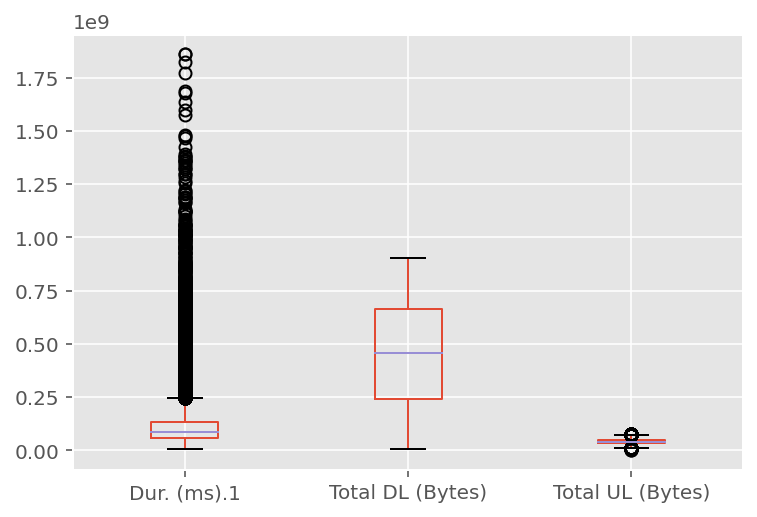

In [193]:
#looking for the outliers
data.boxplot(column=['Dur. (ms).1', "Total DL (Bytes)","Total UL (Bytes)"])


**Graphical** **Analysis**

plotting variable distributions

Text(0.5, 1.0, 'Duration Histogram')

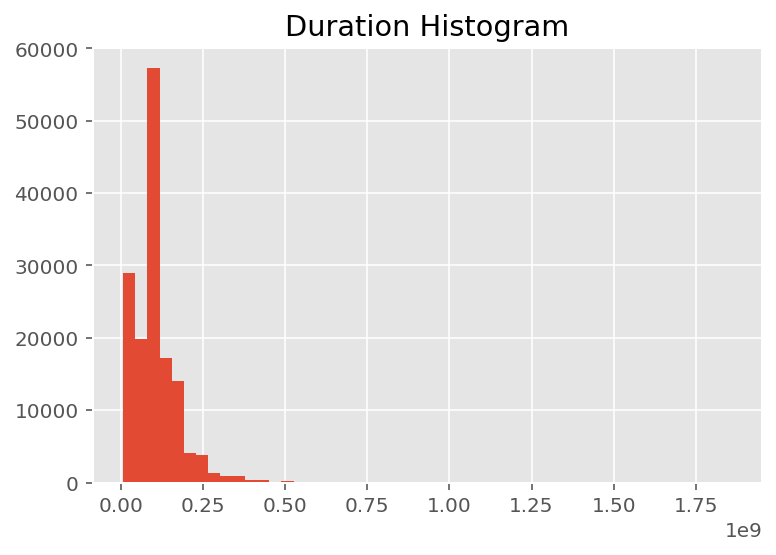

In [194]:
#plotting Histogram for Duration
data["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")

Text(0.5, 1.0, 'Total Download Histogram')

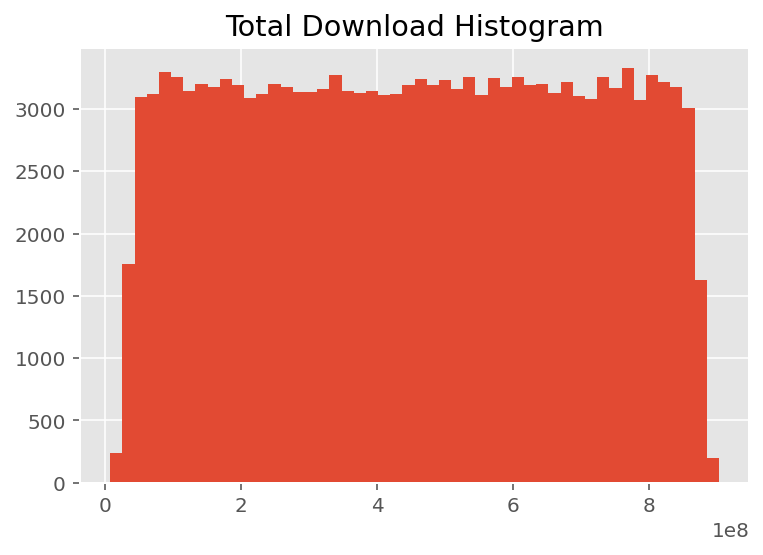

In [195]:
#plotting Histogram for Total Download 

data["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")

Text(0.5, 1.0, 'Total Upload Histogram')

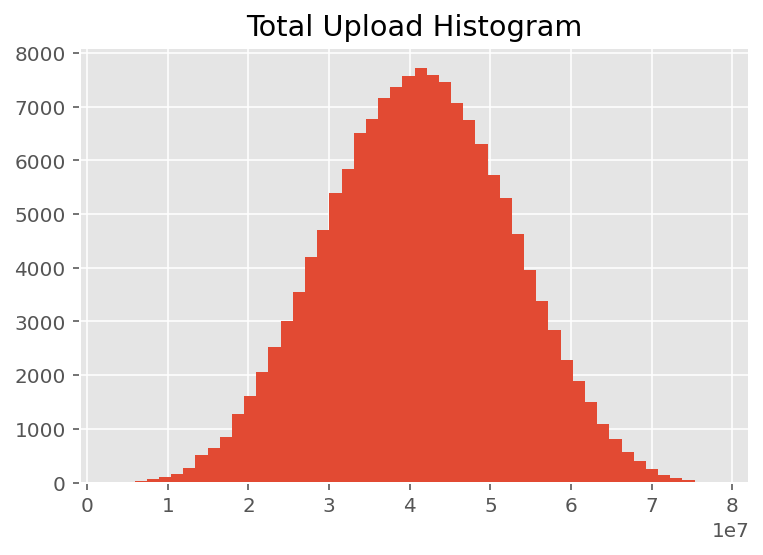

In [196]:
#plotting Histogram for Total Upload 
data["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")

Text(0.5, 1.0, 'Total Social Media Data Histogram')

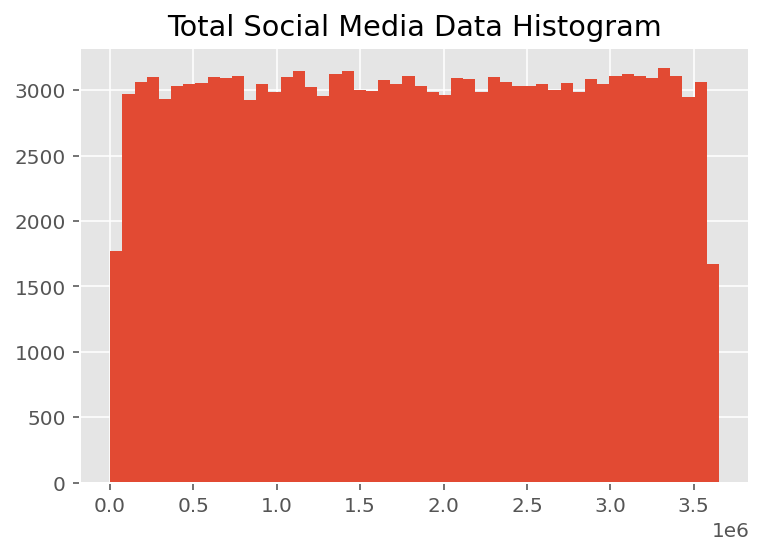

In [197]:
#plotting Histogram for Total Social Media Data
data["Total Social Media"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")

Text(0.5, 1.0, 'Total Google Data Histogram')

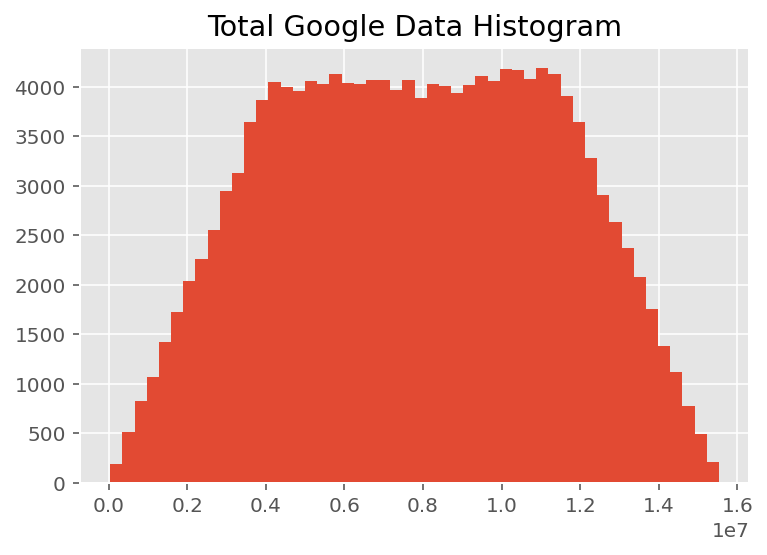

In [198]:
# plotting Histogram for Total Google Data
data["Total Google"].hist(bins = 50)
plt.title("Total Google Data Histogram")

Text(0.5, 1.0, 'Total Email Data Histogram')

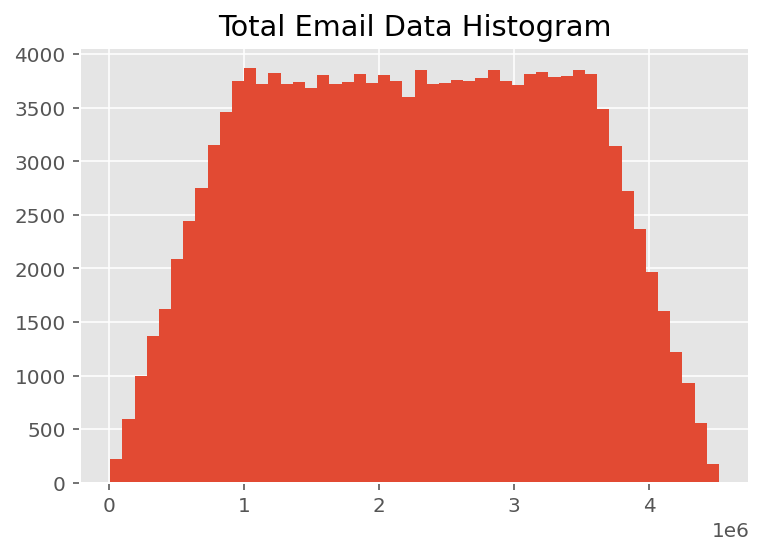

In [199]:
#plotting Histogram  for Total Email Data
data["Total Email"].hist(bins = 50)
plt.title("Total Email Data Histogram")

Text(0.5, 1.0, 'Total Youtube Data Histogram')

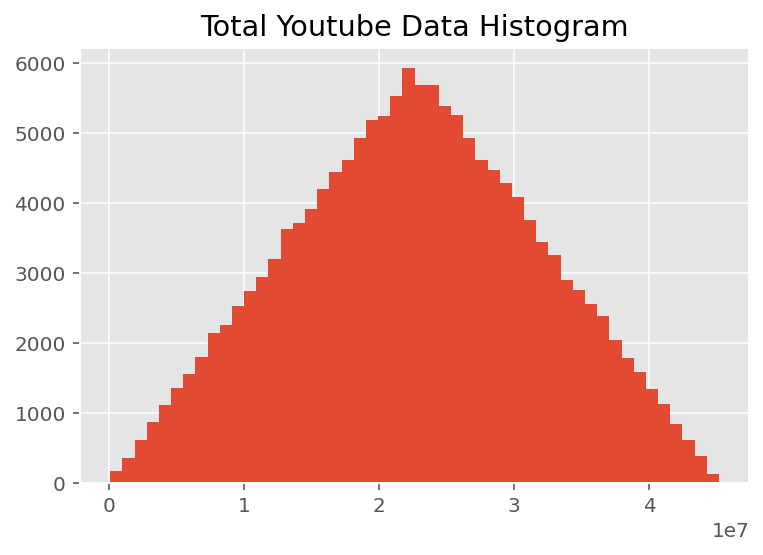

In [200]:
#plotting Histogram for Total Youtube Data 
data["Total Youtube"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")

Text(0.5, 1.0, 'Total Netflix Data Histogram')

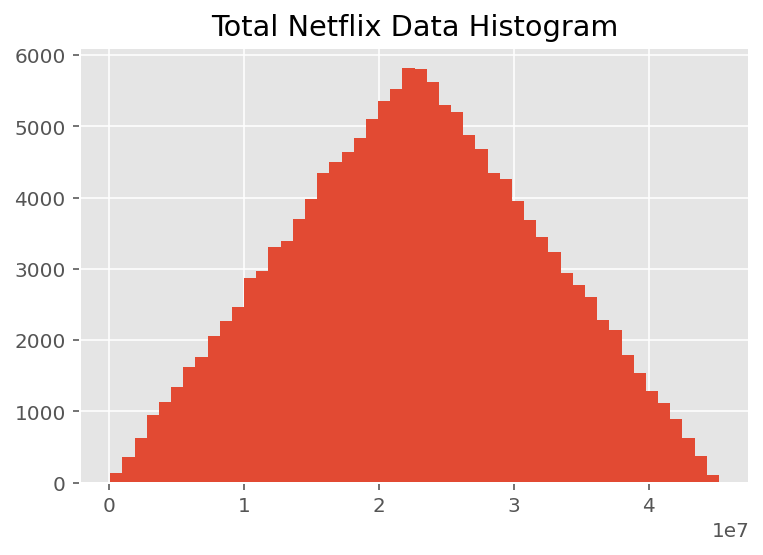

In [201]:
#plotting Histogram for Total Netflix
data["Total Netflix"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")

Text(0.5, 1.0, 'Total Gaming Data Histogram')

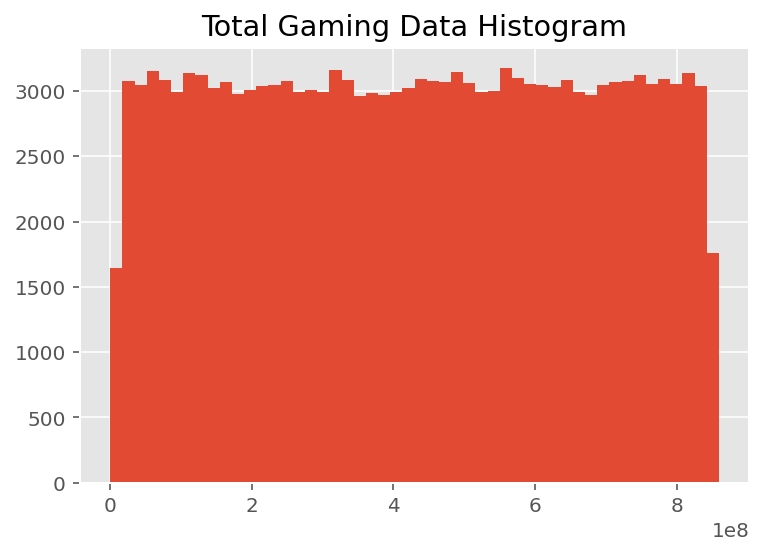

In [202]:
#plotting Histogram for Total Gaming Data
data["Total Gaming"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")

Text(0.5, 1.0, 'App Data usage')

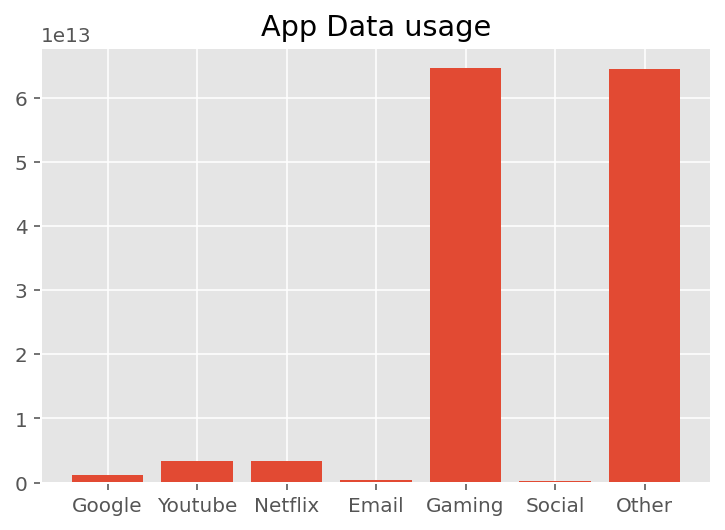

In [203]:
#plotting comparisons
total_usage = app_data[["Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")

**Bivariate** **Analysis**

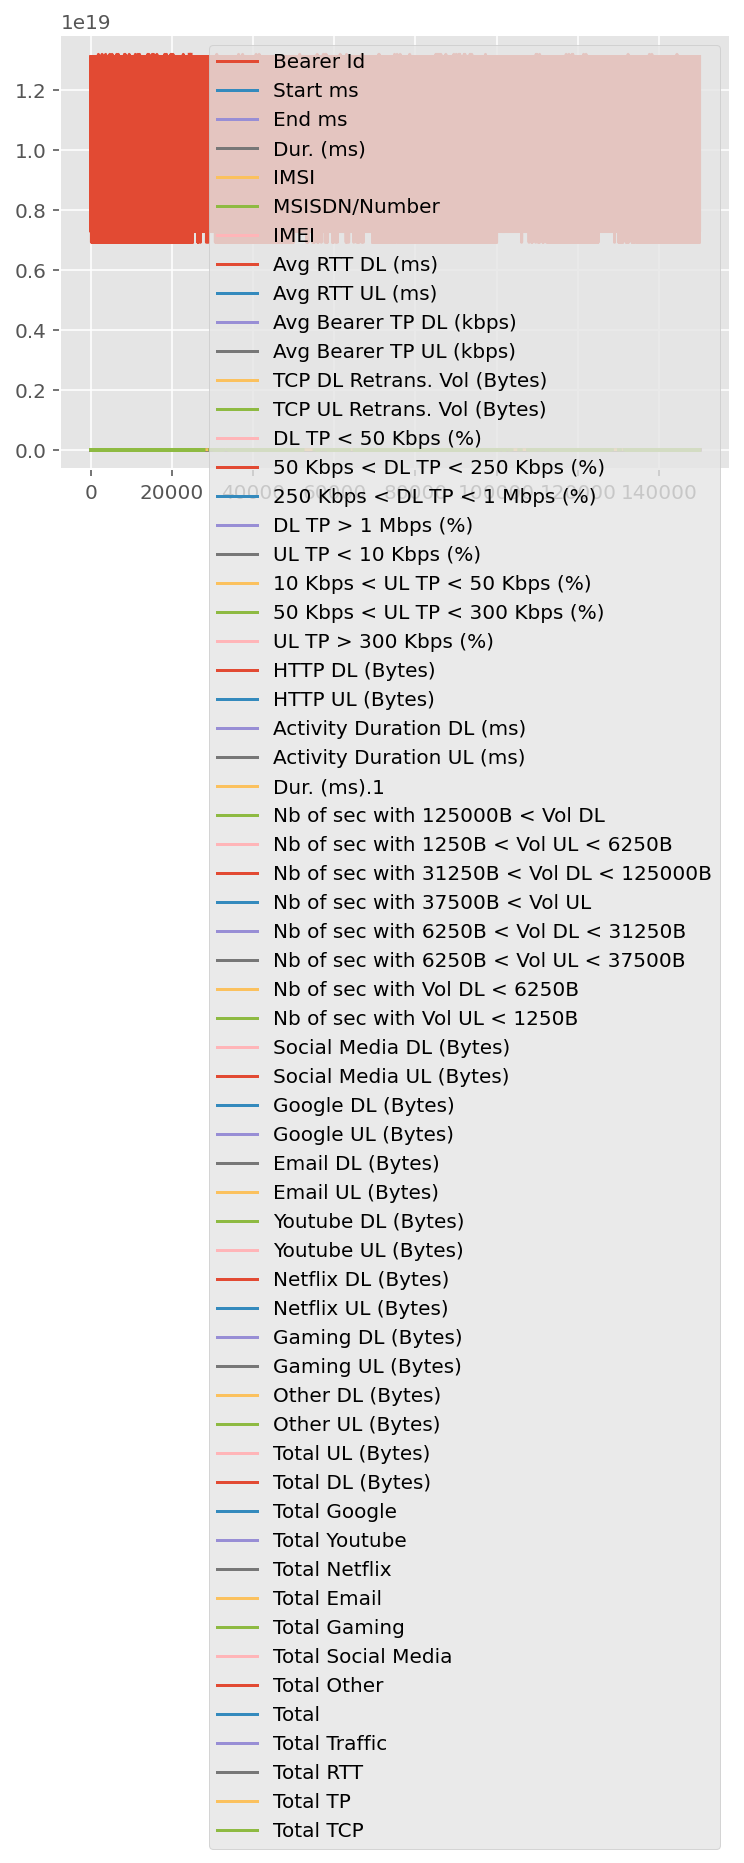

In [265]:
data.plot.line()


**Variable** **transformations**   
segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

In [100]:
#group users into top 5 deciles 
users = data.groupby(["MSISDN/Number"]).agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total UL (Bytes)':'sum', 'Total DL (Bytes)':'sum'}).sort_values(by="Dur. (ms).1", ascending = False)
first_decile = users.iloc[0:10,:]
second_decile = users.iloc[10:20,:]
third_decile = users.iloc[20:30,:]
fourth_decile = users.iloc[30:40,:]
fifth_decile = users.iloc[40:50,:]

#print total data of each decile group
print("Total data of the first decile is: ",first_decile["Total DL (Bytes)"].sum() + first_decile["Total UL (Bytes)"].sum())
print("Total data of the second decile is: ",second_decile["Total DL (Bytes)"].sum() + second_decile["Total UL (Bytes)"].sum())
print("Total data of the third decile is: ",third_decile["Total DL (Bytes)"].sum() + third_decile["Total UL (Bytes)"].sum())
print("Total data of the fourth decile is: ",fourth_decile["Total DL (Bytes)"].sum() + fourth_decile["Total UL (Bytes)"].sum())
print("Total data of the fifth decile is: ",fifth_decile["Total DL (Bytes)"].sum() + fifth_decile["Total UL (Bytes)"].sum())


Total data of the first decile is:  63841375307.0
Total data of the second decile is:  49147663767.0
Total data of the third decile is:  44907065117.0
Total data of the fourth decile is:  31702135331.0
Total data of the fifth decile is:  42662577862.0


**Correlation Analysis** – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email,data, Youtube data, Netflix data, Gaming data, Other data

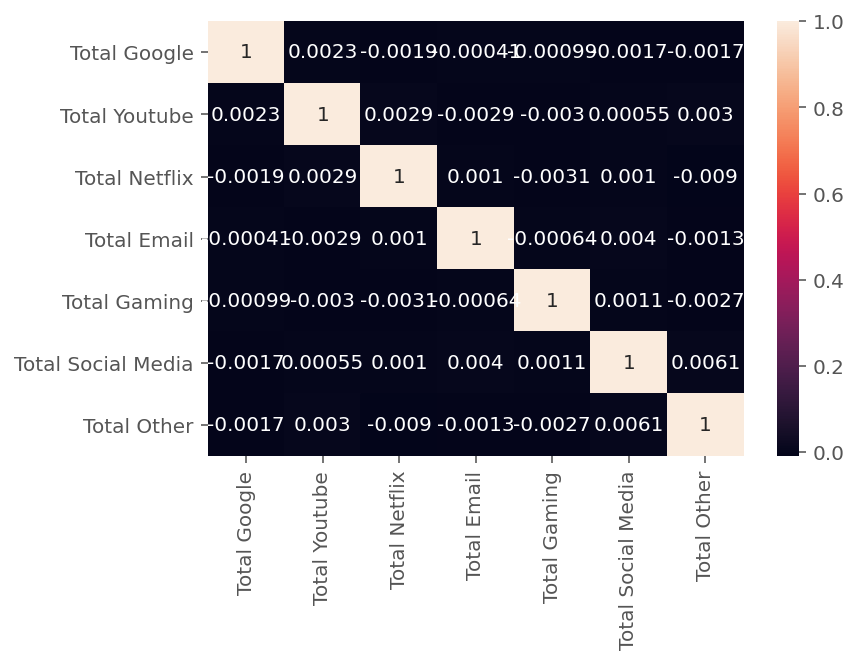

In [205]:
#correlation/Relationship of the variables /Applications)
correlation = total_usage.corr()
sns.heatmap(correlation, annot=True)
plt.show()

**Dimensionality** **Reduction**   
 perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum)

In [206]:
#use PCA to get 4 principal components

pca = PCA(n_components=4)
principal_components = pca.fit_transform(total_usage)
principal_Df = pd.DataFrame(data = principal_components
             , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4'])
principal_Df

,pc_1,pc_2,pc_3,pc_4
0,"42,589,710.49","281,261,592.26","6,389,884.85","-1,105,621.78"
1,"-129,110,654.24","-168,100,608.40","-19,819,419.23","7,467,102.31"
2,"182,767,282.90","83,348,471.22","-7,075,450.18","9,459,990.27"
3,"-240,420,550.40","-444,048,678.43","-968,527.09","15,708,625.88"
4,"-47,462,280.56","-161,936,368.19","-1,756,935.57","12,497,804.78"
...,...,...,...,...
149996,"-242,608,969.28","350,026,736.44","-15,427,856.77","-3,146,633.03"
149997,"-89,304,158.30","-337,521,348.01","-15,212,010.00","-9,894,036.01"
149998,"-231,492,296.98","230,756,839.73","5,549,034.23","5,651,687.38"
149999,"205,285,590.28","-336,307,900.15","8,035,738.54","-1,613,447.18"


Task 2 - **User** **Engagement** **analysis**.    
engagement metrics:

● sessions frequency.       
● the duration of the session.      
● the sessions total traffic (download and upload (bytes))                        
Task 2.1 - Based on the above:

Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [207]:
#adding total traffic to the data
data["Total Traffic"] = data["Total UL (Bytes)"] + data["Total DL (Bytes)"]
engagement = data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total Traffic':'sum'})


print("Top ten frequent users: \n", engagement.sort_values(by="Bearer Id", ascending=False).head(10))
print("\n\nTop ten users with the longest sessions: \n", engagement.sort_values(by="Dur. (ms).1", ascending=False).head(10))
print("\n\nTop ten users with the most data usage: \n", engagement.sort_values(by="Total Traffic", ascending=False).head(10))


Top ten frequent users: 
                    Bearer Id       Dur. (ms).1    Total Traffic
MSISDN/Number                                                  
33,626,320,676.00         18  8,791,936,680.00 7,971,167,261.00
33,625,779,332.00         17 18,553,763,486.00 8,499,620,722.00
33,614,892,860.00         17  9,966,905,758.00 8,846,226,494.00
33,659,725,664.00         16  4,035,436,251.00 7,705,862,783.00
33,675,877,202.00         15  4,865,953,827.00 7,891,110,608.00
33,760,536,639.00         15  9,279,442,000.00 8,514,773,963.00
33,667,163,239.00         13  8,744,922,020.00 5,618,394,054.00
33,760,413,819.00         12  5,321,673,794.00 7,132,370,514.00
33,604,515,716.00         12  5,207,995,411.00 5,487,855,293.00
33,603,127,838.00         12  6,287,767,483.00 4,976,195,043.00


Top ten users with the longest sessions: 
                    Bearer Id       Dur. (ms).1    Total Traffic
MSISDN/Number                                                  
33,625,779,332.00         17 18,5

In [208]:
engagement.describe()

,Bearer Id,Dur. (ms).1,Total Traffic
count,"106,856.00","106,856.00","106,856.00"
mean,1.39,"146,167,916.58","690,962,103.31"
std,0.81,"186,358,950.77","491,055,891.07"
min,0.00,"7,142,988.00","33,249,009.00"
25%,1.00,"71,308,343.00","358,549,907.50"
50%,1.00,"102,740,222.00","617,923,138.00"
75%,2.00,"172,800,001.00","857,435,147.75"
max,18.00,"18,553,763,486.00","8,846,226,494.00"


**Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement**

In [209]:
# normalizing the engagement dataframe
norm_engagement = (engagement - engagement.mean())/engagement.std()
norm_engagement.describe()

,Bearer Id,Dur. (ms).1,Total Traffic
count,"106,856.00","106,856.00","106,856.00"
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.72,-0.75,-1.34
25%,-0.48,-0.40,-0.68
50%,-0.48,-0.23,-0.15
75%,0.75,0.14,0.34
max,20.51,98.77,16.61


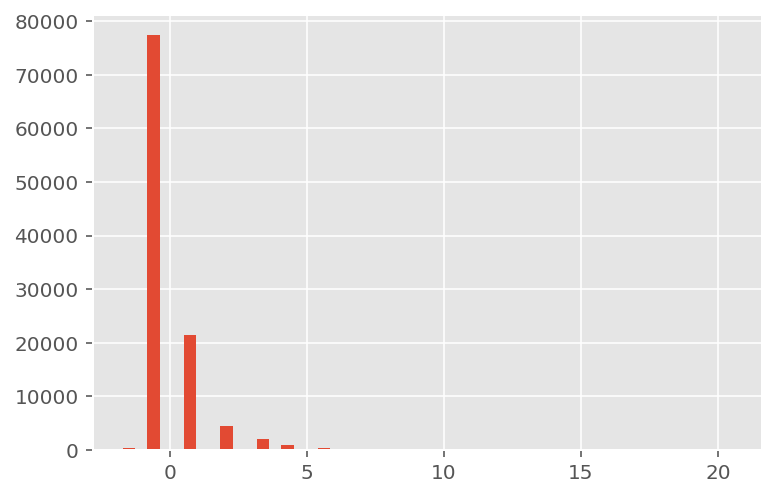

In [210]:
#checking the normalized variables
norm_engagement["Bearer Id"].hist(bins=50)

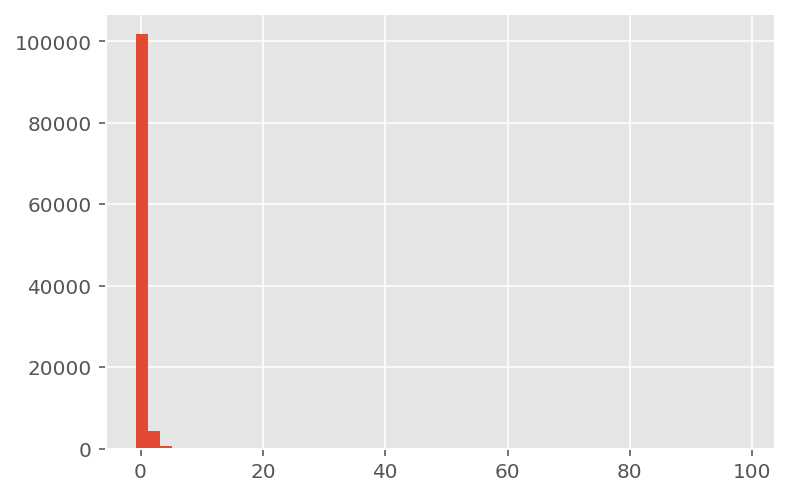

In [211]:
norm_engagement["Dur. (ms).1"].hist(bins=50)

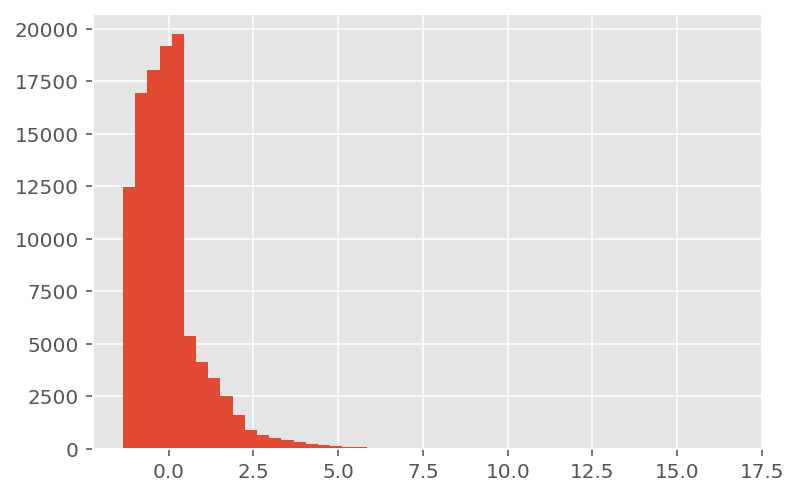

In [212]:
norm_engagement["Total Traffic"].hist(bins=50)

In [213]:
#perform kmeans clustering with k=3
kmeans_3k = KMeans(n_clusters = 3)
kmeans_3k.fit(norm_engagement)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
#assign cluster to each user 
engagement_centroids = kmeans_3k.cluster_centers_cluster_3k = kmeans_3k.predict(norm_engagement)
norm_engagement['cluster_3k'] = cluster_3k

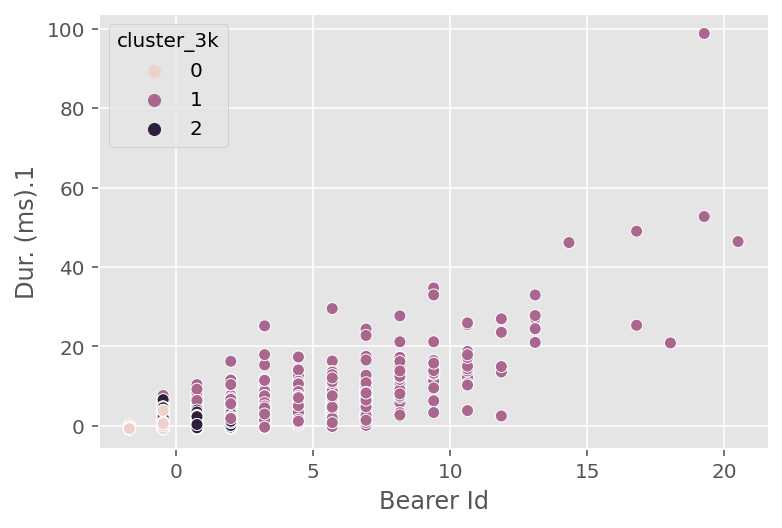

In [215]:
#plotting clusters
sns.scatterplot(x=norm_engagement.iloc[:,0], y=norm_engagement.iloc[:,1], hue=norm_engagement["cluster_3k"], legend="full")

Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.

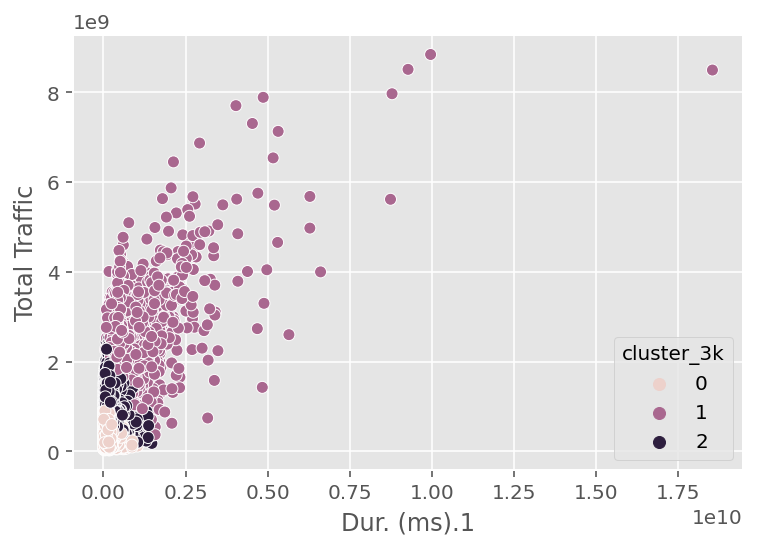

In [218]:
engagement["cluster_3k"]=cluster_3k
sns.scatterplot(x=engagement["Dur. (ms).1"], y=engagement["Total Traffic"], hue=engagement["cluster_3k"], legend="full")

In [219]:
#number of users in each cluster
print("C.   Total Users")
engagement["cluster_3k"].value_counts()

C.   Total Users


0    79871
2    23437
1     3548
Name: cluster_3k, dtype: int64

In [220]:
engagement[engagement.cluster_3k == 0].describe()

,Bearer Id,Dur. (ms).1,Total Traffic,cluster_3k
count,"79,871.00","79,871.00","79,871.00","79,871.00"
mean,1.02,"103,098,888.35","495,091,508.31",0.00
std,0.18,"69,447,896.64","241,842,353.78",0.00
min,0.00,"7,142,988.00","33,249,009.00",0.00
25%,1.00,"54,303,133.50","289,144,590.00",0.00
50%,1.00,"86,400,033.00","494,163,980.00",0.00
75%,1.00,"138,820,247.50","701,511,319.50",0.00
max,2.00,"1,035,261,556.00","1,427,100,348.00",0.00


In [221]:
engagement[engagement.cluster_3k == 1].describe()

,Bearer Id,Dur. (ms).1,Total Traffic,cluster_3k
count,"3,548.00","3,548.00","3,548.00","3,548.00"
mean,4.41,"658,343,133.65","2,291,276,349.45",1.00
std,1.24,"700,781,039.43","718,197,944.03",0.00
min,1.00,"66,595,562.00","370,420,998.00",1.00
25%,4.00,"345,675,162.75","1,841,579,330.50",1.00
50%,4.00,"432,003,082.50","2,192,872,017.00",1.00
75%,5.00,"689,698,783.50","2,615,387,110.75",1.00
max,18.00,"18,553,763,486.00","8,846,226,494.00",1.00


In [222]:
engagement[engagement.cluster_3k == 2].describe()

,Bearer Id,Dur. (ms).1,Total Traffic,cluster_3k
count,"23,437.00","23,437.00","23,437.00","23,437.00"
mean,2.18,"215,407,524.18","1,116,207,030.02",2.00
std,0.43,"129,441,684.95","350,351,403.30",0.00
min,1.00,"18,235,797.00","177,006,936.00",2.00
25%,2.00,"124,079,800.00","857,723,635.00",2.00
50%,2.00,"187,937,724.00","1,086,143,909.00",2.00
75%,2.00,"272,558,973.00","1,353,053,304.00",2.00
max,4.00,"1,480,875,272.00","2,512,802,189.00",2.00


Aggregate user total traffic per application and derive the top 10 most engaged users per application - (jupyter notebook + slide)
Plot the top 3 most used applications. 

In [223]:
app_total = data.groupby('MSISDN/Number').agg({ 'Total Traffic':'sum',"Total Google":'sum', "Total Youtube":'sum', "Total Netflix":'sum', "Total Email":'sum', "Total Gaming":'sum', "Total Social Media":'sum', "Total Other":'sum'})


for coll in app_total:
    print("\n\nTop ten ",coll," users: \n", app_total.sort_values(by=coll, ascending=False)[coll].head(10))




Top ten  Total Traffic  users: 
 MSISDN/Number
33,614,892,860.00   8,846,226,494.00
33,760,536,639.00   8,514,773,963.00
33,625,779,332.00   8,499,620,722.00
33,626,320,676.00   7,971,167,261.00
33,675,877,202.00   7,891,110,608.00
33,659,725,664.00   7,705,862,783.00
33,666,464,084.00   7,308,500,938.00
33,760,413,819.00   7,132,370,514.00
33,664,712,899.00   6,872,018,208.00
33,698,792,269.00   6,540,899,126.00
Name: Total Traffic, dtype: float64


Top ten  Total Google  users: 
 MSISDN/Number
33,626,320,676.00   152,191,852.00
33,625,779,332.00   142,307,915.00
33,614,892,860.00   127,973,787.00
33,760,536,639.00   123,223,099.00
33,659,725,664.00   116,516,345.00
33,786,323,068.00   110,254,484.00
33,675,877,202.00   109,860,502.00
33,667,163,239.00   105,032,696.00
33,761,268,199.00    97,089,988.00
33,698,756,430.00    91,935,151.00
Name: Total Google, dtype: float64


Top ten  Total Youtube  users: 
 MSISDN/Number
33,625,779,332.00   452,958,769.00
33,760,536,639.00   396,289,

In [224]:
#print top 3 used apps
top_used = pd.DataFrame(columns=["Name", "Total Data"])
for col in app_total:
    top_used.loc[len(top_used)] = [col, app_total[col].sum()]

top_three = top_used.sort_values(by = "Total Data", ascending = False)[1:4]
print("Top three used applications: ")
top_three

Top three used applications: 


,Name,Total Data
5,Total Gaming,"64,088,917,409,212.00"
7,Total Other,"63,954,252,515,822.00"
2,Total Youtube,"3,372,204,313,367.00"


Text(0.5, 1.0, 'Top 3 most used apps')

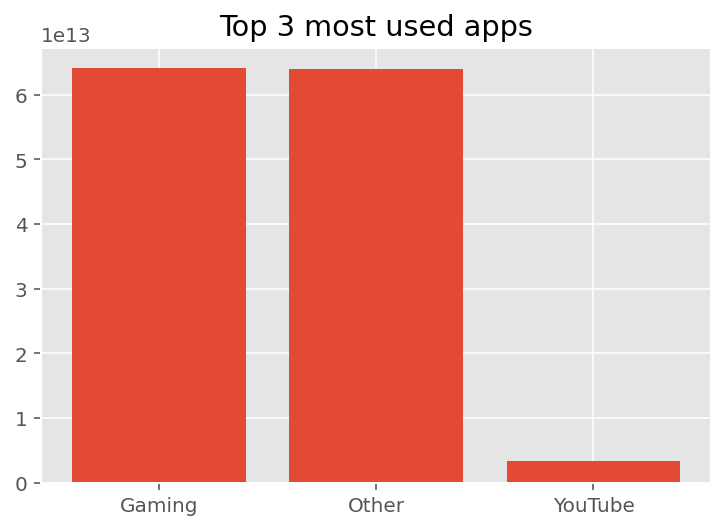

In [225]:
#plot the top 3 apps
ind = np.arange(3)
width =0.8

plt.xticks(ind , ("Gaming", "Other", "YouTube"))
plt.bar(ind, top_three["Total Data"], width, label = "Total Usage")
plt.title("Top 3 most used apps")


Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:                                             
What is the optimized value of k?      
Interpret your findings. 

In [227]:
#calculating inertia for k values 1 -19
inertia = []
for cluster in range(1,20):
    km = KMeans(n_jobs = -1, n_clusters = cluster)
    km.fit(norm_engagement)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

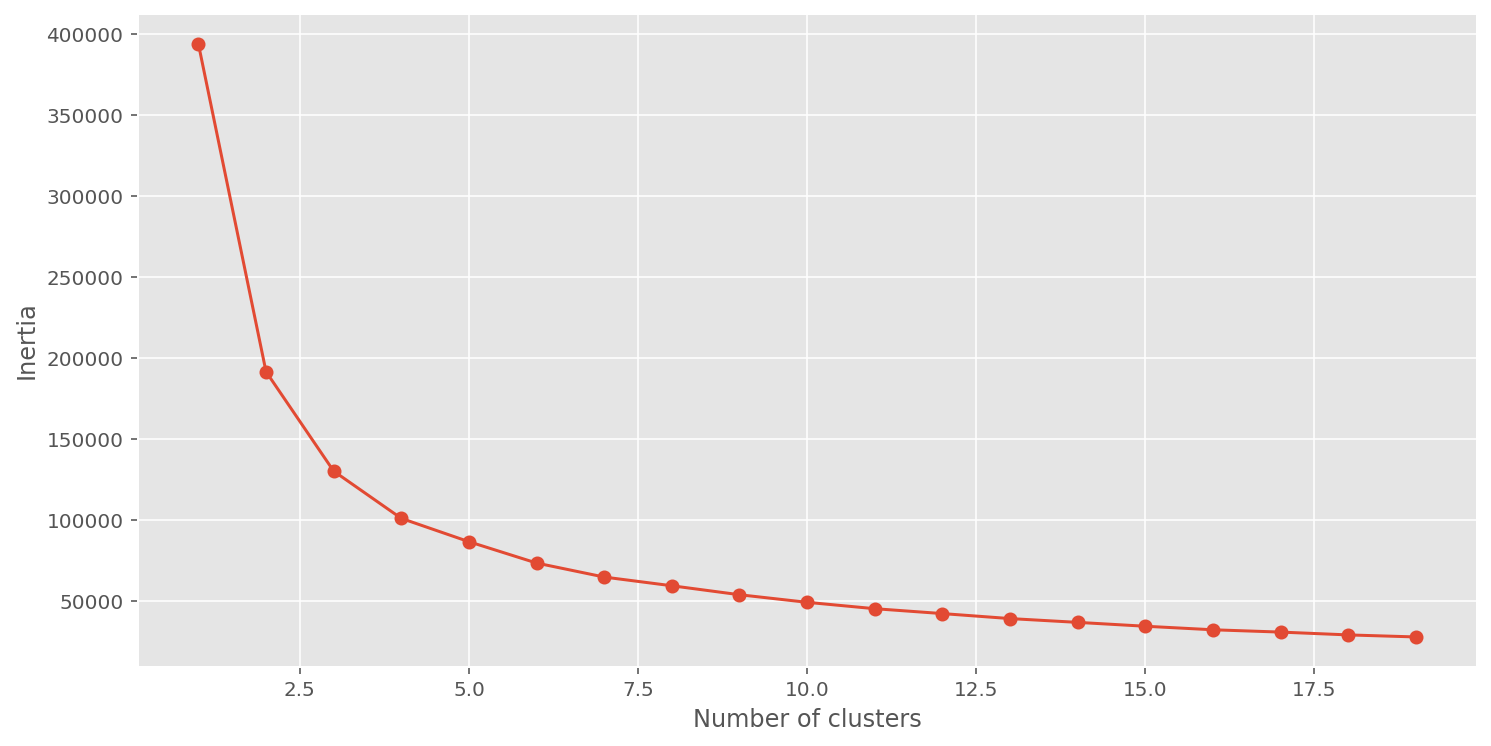

In [228]:
#plotting k Vs inertia 
frame = pd.DataFrame({'k':range(1,20), 'inertia':inertia})

plt.figure(figsize=(12,6))
plt.plot(frame['k'], frame['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

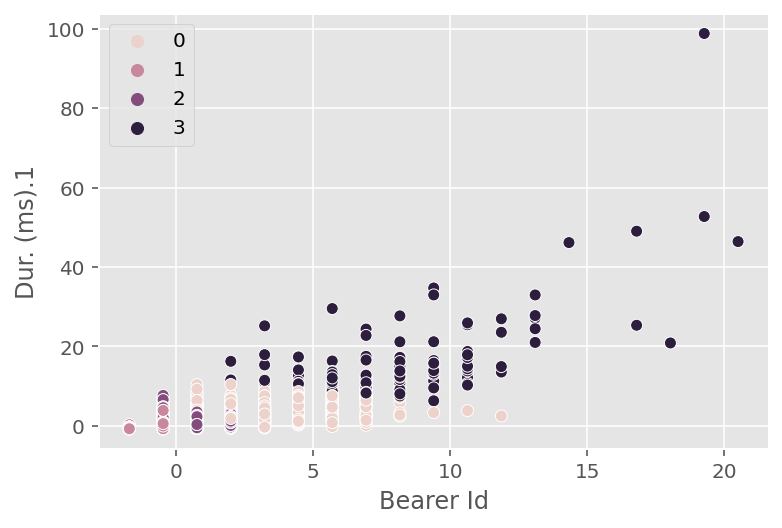

In [231]:
#taking k = 4 and clustering
kmeans_4k = KMeans(n_clusters=4)
kmeans_4k.fit(norm_engagement)

sns.scatterplot(x=norm_engagement.iloc[:,0], y=norm_engagement.iloc[:,1], hue=kmeans_4k.labels_, legend="full")


Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):         
● Average TCP retransmission   
● Average RTT                 
● Handset type

In [235]:
#adding total network parameters
data["Total RTT"] = data["Avg RTT DL (ms)"] + data["Avg RTT UL (ms)"]
data["Total TP"] = data["Avg Bearer TP DL (kbps)"] + data["Avg Bearer TP UL (kbps)"]
data["Total TCP"] = data["TCP DL Retrans. Vol (Bytes)"] + data["TCP UL Retrans. Vol (Bytes)"]
experience = data.groupby('MSISDN/Number').agg({'Total TCP':'sum', 'Total RTT':'sum', 'Total TP':'sum', 'Handset Type':'count'})#

In [236]:
experience

,Total TCP,Total RTT,Total TP,Handset Type
MSISDN/Number,,,,
"33,601,001,722.00",0.00,46.00,76.00,1
"33,601,001,754.00",0.00,31.00,99.00,1
"33,601,002,511.00",0.00,0.00,97.00,1
"33,601,007,832.00",0.00,84.00,248.00,1
"33,601,008,617.00","9,370,832.00",119.00,"56,844.00",2
...,...,...,...,...
"33,789,996,170.00","218,045.00",52.00,"10,365.00",1
"33,789,997,247.00",0.00,40.00,116.00,1
"3,197,020,876,596.00",0.00,0.00,1.00,1


Task 3.2 - Compute & list 10 of the top, bottom and most frequent:    
a. TCP values in the dataset.    
b. RTT values in the dataset.    
c. Throughput values in the dataset.

In [237]:
print("\n\nTop ten TCP values: \n", experience.sort_values(by="Total TCP", ascending=False).head(10))
print("\n\nTop ten RTT values: \n", experience.sort_values(by="Total RTT", ascending=False).head(10))
print("\n\nTop ten Throughput values: \n", experience.sort_values(by="Total TP", ascending=False).head(10))




Top ten TCP values: 
                          Total TCP  Total RTT   Total TP  Handset Type
MSISDN/Number                                                         
33,667,725,464.00 8,354,209,105.00     703.00 379,713.00             5
33,659,084,281.00 7,941,860,302.00     396.00 210,259.00             3
33,761,284,050.00 6,043,978,448.00     351.00 144,570.00             2
33,762,644,658.00 5,879,989,037.00   2,860.00 549,661.00             5
33,650,658,056.00 5,593,366,107.00   1,543.00 259,548.00             5
33,663,180,885.00 5,566,928,580.00     583.00 127,603.00             4
33,763,572,381.00 5,179,458,974.00     479.00 120,288.00             2
33,669,054,076.00 5,174,214,964.00     321.00 142,042.00             4
33,658,638,625.00 5,165,856,986.00     171.00 105,875.00             2
33,763,859,490.00 5,095,685,475.00   1,184.00 312,289.00             6


Top ten RTT values: 
                    Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                       

In [238]:
print("\n\nBottom ten TCP values: \n", experience.sort_values(by="Total TCP", ascending=True).head(10))
print("\n\nBottom ten RTT values: \n", experience.sort_values(by="Total RTT", ascending=True).head(10))
print("\n\nBottom ten Throughput values: \n", experience.sort_values(by="Total TP", ascending=True).head(10))




Bottom ten TCP values: 
                    Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                                  
33,601,001,722.00       0.00      46.00     76.00             1
33,666,741,064.00       0.00      81.00    188.00             2
33,666,740,960.00       0.00     122.00    157.00             2
33,666,739,912.00       0.00       0.00     79.00             1
33,666,739,487.00       0.00      40.00     42.00             1
33,666,738,646.00       0.00      58.00 17,890.00             1
33,666,738,253.00       0.00      33.00     54.00             1
33,666,738,090.00       0.00       0.00     99.00             1
33,666,741,973.00       0.00     114.00    816.00             1
33,666,736,638.00       0.00      28.00     84.00             1


Bottom ten RTT values: 
                         Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                                       
882,397,108,489,451.00       0.00       

In [239]:
top10_tcp = experience.groupby('Total TCP').size().sort_values(ascending = False).head(10)
top10_tcp

top10_rtt = experience.groupby('Total RTT').size().sort_values(ascending = False).head(10)
top10_rtt

top10_tp = experience.groupby('Total TP').size().sort_values(ascending = False).head(10)
top10_tp


print("\n\nTen most frequent TCP values: \n", top10_tcp)
print("\n\nTen most frequent RTT values: \n", top10_rtt)
print("\n\nTen most frequent Throughput values: \n", top10_tp)



Ten most frequent TCP values: 
 Total TCP
0.00         67565
5,320.00        21
2,660.00        21
6,650.00        18
3,990.00        17
7,980.00        13
1,873.00         9
11,970.00        8
2,648.00         8
10,640.00        7
dtype: int64


Ten most frequent RTT values: 
 Total RTT
0.00     18546
29.00     2778
39.00     2245
38.00     1541
30.00     1478
40.00     1466
28.00     1373
49.00     1268
31.00     1096
41.00     1095
dtype: int64


Ten most frequent Throughput values: 
 Total TP
15.00    2685
63.00    2072
97.00    1023
90.00    1005
98.00     971
96.00     866
99.00     853
89.00     817
95.00     798
91.00     793
dtype: int64


Task 3.3 - Compute & report 

The distribution of the average throughput per handset type and provide interpretation for your findings.
The average TCP retransmission view per handset type and provide interpretation for your findings.

In [240]:
handset = data.groupby('Handset Type').agg({'Total TCP':'sum', 'Total RTT':'sum', 'Total TP':'sum'})

print("\n\nThroughput\n",handset.sort_values(by="Total TP", ascending = False).head(10))
print("\n\nTCP Retransmission\n",handset.sort_values(by="Total TCP", ascending = False).head(10))




Throughput
                                         Total TCP    Total RTT       Total TP
Handset Type                                                                 
Huawei B528S-23A             1,042,623,154,287.00 2,984,690.00 833,510,472.00
undefined                        7,873,569,186.00   550,453.00  90,414,733.00
Apple iPhone 7 (A1778)           8,214,772,255.00   699,835.00  77,183,403.00
Apple iPhone 6S (A1688)         11,128,797,619.00   725,131.00  74,298,231.00
Apple iPhone 6 (A1586)          10,227,015,391.00   902,390.00  68,735,008.00
Huawei E5180                    60,227,868,187.00   342,228.00  64,368,628.00
Samsung Galaxy S8 (Sm-G950F)     6,445,682,984.00   231,572.00  63,224,397.00
Apple iPhone Xr (A2105)          8,891,681,160.00   304,898.00  62,436,108.00
Apple iPhone 8 (A1905)           5,501,643,291.00   504,114.00  58,106,552.00
Apple iPhone X (A1901)           7,856,174,796.00   330,971.00  57,047,497.00


TCP Retransmission
                             

Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster

In [241]:
#normalizing the experience dataframe
norm_experience = (experience - experience.mean())/experience.std()
norm_experience

,Total TCP,Total RTT,Total TP,Handset Type
MSISDN/Number,,,,
"33,601,001,722.00",-0.08,-0.14,-0.49,-0.49
"33,601,001,754.00",-0.08,-0.17,-0.49,-0.49
"33,601,002,511.00",-0.08,-0.21,-0.49,-0.49
"33,601,007,832.00",-0.08,-0.09,-0.49,-0.49
"33,601,008,617.00",-0.02,-0.03,0.84,0.75
...,...,...,...,...
"33,789,996,170.00",-0.08,-0.14,-0.25,-0.49
"33,789,997,247.00",-0.08,-0.15,-0.49,-0.49
"3,197,020,876,596.00",-0.08,-0.21,-0.49,-0.49


In [243]:
#performing kmeans with k=3
kmeans_exp = KMeans(n_clusters=3)
kmeans_exp.fit(norm_experience)
cluster_exp = kmeans_exp.predict(norm_experience)
experience_centroids = kmeans_exp.cluster_centers_

In [244]:
#assign the clusters
norm_experience['cluster_exp'] = cluster_exp
norm_experience['cluster_exp'].value_counts()

0    97296
2     9333
1      227
Name: cluster_exp, dtype: int64

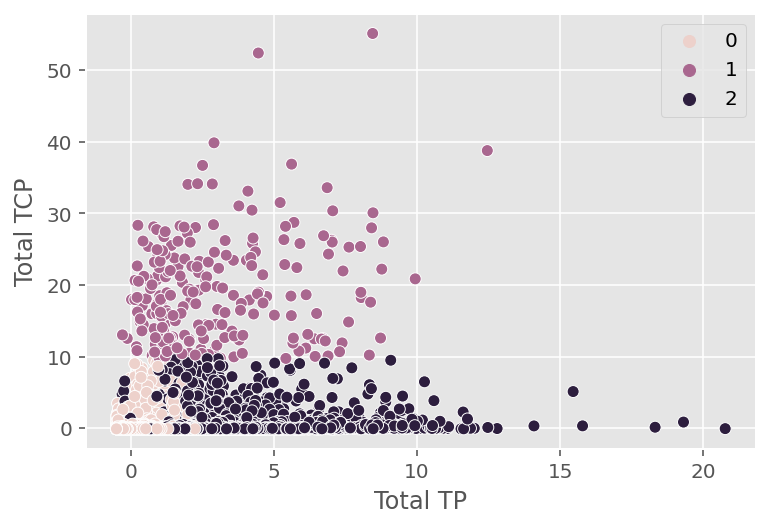

In [245]:
#plot the clusters
sns.scatterplot(x=norm_experience.iloc[:,2], y=norm_experience.iloc[:,0], hue=kmeans_exp.labels_, legend="full")

Task 4

Task 4. 1 - Write a python program to assign:

a. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) - (jupyter notebook ) from scipy.spatial import distance

b. experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [246]:
#compute each cluster mean to find the worst experienced cluster
print(norm_experience[norm_experience["cluster_exp"]==0].mean())
print(norm_experience[norm_experience["cluster_exp"]==1].mean())
print(norm_experience[norm_experience["cluster_exp"]==2].mean())

Total TCP      -0.06
Total RTT      -0.04
Total TP       -0.21
Handset Type   -0.21
cluster_exp     0.00
dtype: float64
Total TCP      19.24
Total RTT       0.34
Total TP        3.04
Handset Type    1.27
cluster_exp     1.00
dtype: float64
Total TCP      0.15
Total RTT      0.43
Total TP       2.15
Handset Type   2.16
cluster_exp    2.00
dtype: float64


In [247]:
#compute each cluster mean to find the least engaged group
print(norm_engagement[norm_engagement["cluster_3k"]==0].mean())
print(norm_engagement[norm_engagement["cluster_3k"]==1].mean())
print(norm_engagement[norm_engagement["cluster_3k"]==2].mean())

Bearer Id       -0.45
Dur. (ms).1     -0.23
Total Traffic   -0.40
cluster_3k       0.00
dtype: float64
Bearer Id       3.73
Dur. (ms).1     2.75
Total Traffic   3.26
cluster_3k      1.00
dtype: float64
Bearer Id       0.98
Dur. (ms).1     0.37
Total Traffic   0.87
cluster_3k      2.00
dtype: float64


In [248]:
#Calculating Euclidean distance to get engagement and experience scores
satisfaction = pd.DataFrame()
satisfaction['eng_score'] = ((norm_engagement[["Bearer Id","Dur. (ms).1","Total Traffic"]] - np.array(engagement_centroids[1])).pow(2)).sum(1).pow(0.5)
satisfaction['exp_score'] = ((norm_experience[["Total TCP","Total RTT","Total TP","Handset Type"]] - np.array(experience_centroids[0])).pow(2)).sum(1).pow(0.5)

satisfaction

,eng_score,exp_score
MSISDN/Number,,
"33,601,001,722.00",1.98,0.41
"33,601,001,754.00",2.69,0.41
"33,601,002,511.00",2.18,0.43
"33,601,007,832.00",2.62,0.39
"33,601,008,617.00",1.70,1.43
...,...,...
"33,789,996,170.00",2.47,0.30
"33,789,997,247.00",2.30,0.41
"3,197,020,876,596.00",3.81,0.43


Task 4.2 - Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

In [249]:
#Taking the average of engagement and experience as a satisfaction score
satisfaction["satisfaction_score"] = (satisfaction['eng_score'] + satisfaction['exp_score'])/2
satisfaction.sort_values(by="satisfaction_score", ascending = False).head(10)

,eng_score,exp_score,satisfaction_score
MSISDN/Number,,,
"33,662,317,023.00",2.57,144.94,73.76
"33,625,779,332.00",100.58,20.13,60.35
"33,660,874,265.00",0.53,96.65,48.59
"33,683,692,867.00",2.38,81.94,42.16
"33,614,892,860.00",57.01,21.89,39.45
"33,626,320,676.00",51.31,20.97,36.14
"33,760,536,639.00",52.70,17.60,35.15
"33,698,551,167.00",1.15,68.73,34.94
"33,667,163,239.00",47.93,18.42,33.17


Task 4.3 - Run a regression model of your choice to predict the satisfaction score of a customer.

In [250]:
#Using linear regression model to predict user satisfaction
model = LinearRegression()
inputs = satisfaction[["eng_score","exp_score"]]
target = satisfaction["satisfaction_score"]
model.fit(inputs,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
#intercept and coefficients of the model z=ax + by +c
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)
print ('Predicted Satisfaction Score: ', model.predict([[10,8]]))

Intercept:  4.440892098500626e-16
Coefficients:  [0.5 0.5]
Predicted Satisfaction Score:  [9.]


Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

In [253]:
#running kmeans with k=2 to group users
kmeans_score = KMeans(n_clusters=2)
kmeans_score.fit(satisfaction[["eng_score","exp_score"]])
score_cluster = kmeans_score.predict(satisfaction[["eng_score","exp_score"]])
score_centroids = kmeans_score.cluster_centers_

In [254]:
#Assigning cluster to each user
satisfaction['score_cluster'] = score_cluster
satisfaction

,eng_score,exp_score,satisfaction_score,score_cluster
MSISDN/Number,,,,
"33,601,001,722.00",1.98,0.41,1.19,0
"33,601,001,754.00",2.69,0.41,1.55,0
"33,601,002,511.00",2.18,0.43,1.30,0
"33,601,007,832.00",2.62,0.39,1.51,0
"33,601,008,617.00",1.70,1.43,1.57,0
...,...,...,...,...
"33,789,996,170.00",2.47,0.30,1.39,0
"33,789,997,247.00",2.30,0.41,1.36,0
"3,197,020,876,596.00",3.81,0.43,2.12,0


Task 4.5 - Aggregate the average satisfaction & experience score per cluster.

In [259]:
#Average satisfaction and experience score of cluster 0
print("Cluster 0 average experience score",satisfaction[satisfaction['score_cluster']==0]["exp_score"].mean())
print("Cluster 0 average satisfaction score",satisfaction[satisfaction['score_cluster']==0]["satisfaction_score"].mean())

Cluster 0 average experience score 0.8268351997626435
Cluster 0 average satisfaction score 1.4977835536863011


In [258]:
#Average satisfaction and experience score of cluster 1
print("Cluster 1 average experience score",satisfaction[satisfaction['score_cluster']==0]["exp_score"].mean())
print("Cluster 1 average satisfaction score",satisfaction[satisfaction['score_cluster']==0]["satisfaction_score"].mean())

Cluster 1 average experience score 0.8268351997626435
Cluster 1 average satisfaction score 1.4977835536863011


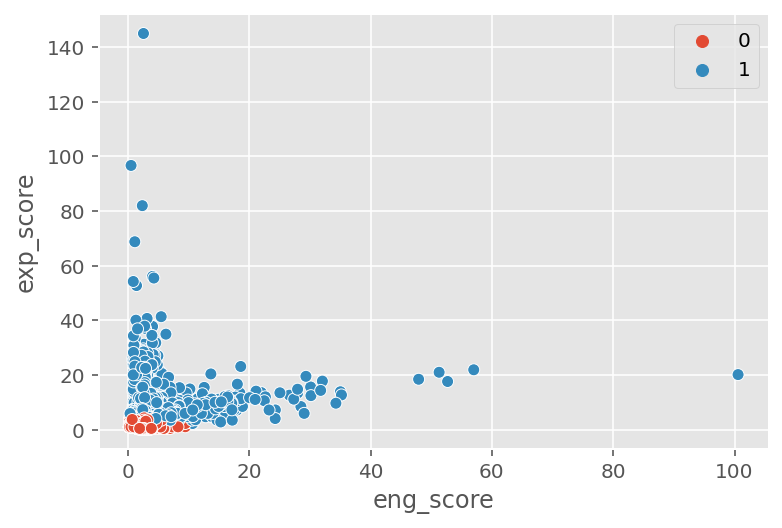

In [260]:
sns.scatterplot(x=satisfaction.iloc[:,0], y=satisfaction.iloc[:,1], hue=kmeans_score.labels_, legend="full")

Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select on the exported table.

In [261]:
#subsetting the dataframe to export
export = satisfaction[["eng_score", "exp_score", "satisfaction_score"]]

In [263]:
#connecting to local dtabase and writing the dataframe
connection = sqlite3.connect('tellco.db')
export.to_sql(name = 'satisfaction', con = connection, if_exists = 'replace')
connection.close()

In [264]:
#Retrieving the dataframe from local database
connection = sqlite3.connect('tellco.db')
query_output = pd.read_sql('select "MSISDN/Number", '+
        '"satisfaction_score" from satisfaction', connection)
print(query_output)
connection.close()

                MSISDN/Number  satisfaction_score
0           33,601,001,722.00                1.19
1           33,601,001,754.00                1.55
2           33,601,002,511.00                1.30
3           33,601,007,832.00                1.51
4           33,601,008,617.00                1.57
...                       ...                 ...
106851      33,789,996,170.00                1.39
106852      33,789,997,247.00                1.36
106853   3,197,020,876,596.00                2.12
106854 337,000,037,000,919.00                1.19
106855 882,397,108,489,451.00                2.15

[106856 rows x 2 columns]
